In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
#Get all columns
# pd.set_option('display.max_columns')
pd.set_option('display.max_columns', None)

In [2]:
#Reading a train set
train=pd.read_csv('train.csv')

In [3]:
#Top 5 Record of a train set
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
#Reading a test set
test=pd.read_csv('test_QoiMO9B.csv')

In [5]:
#Top 5 Record of a test set
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
#reading meal_info.csv 
meal_info=pd.read_csv('meal_info.csv')

In [7]:
#Top 5 element of a meal_info.csv
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
#Reading fulfilment_center_info.csv
center_info=pd.read_csv('fulfilment_center_info.csv')

In [9]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
#Merging meal_info  train , test 
train=pd.merge(train,meal_info,on='meal_id')
test=pd.merge(test,meal_info,on='meal_id')

In [11]:
#Merging center_info  train , test 
train=pd.merge(train,center_info,on='center_id')
test=pd.merge(test,center_info,on='center_id')

In [12]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [13]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [14]:
#Shape of the dataset
train.shape

(456548, 15)

In [15]:
#describing the training set
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [16]:
#All the feature's in dataset
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [17]:
#Numerical feature in a training set
numerical_feature=[feature for feature in train.columns if train[feature].dtypes!='O']
print("Numerical feature in a dataset : ")
for feature in numerical_feature:
    print("\t",feature)

Numerical feature in a dataset : 
	 id
	 week
	 center_id
	 meal_id
	 checkout_price
	 base_price
	 emailer_for_promotion
	 homepage_featured
	 num_orders
	 city_code
	 region_code
	 op_area


In [18]:
#Categorical feature in a training set
cat_feature=[feature for feature in train.columns if train[feature].dtypes=='O']
print("Categorical feature in a dataset : ")
for feature in cat_feature:
    print("\t",feature)

Categorical feature in a dataset : 
	 category
	 cuisine
	 center_type


In [19]:
#Describing the categorical feature 
train[cat_feature].describe()

,category,cuisine,center_type
count,456548,456548,456548
unique,14,4,3
top,Beverages,Italian,TYPE_A
freq,127890,122925,262881


In [20]:
#Checking for nan values in train set
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [21]:
#Checking for nan values in test set
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [22]:
#Correlation of training numerical feature
cor=train.corr()
cor

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


<AxesSubplot:>

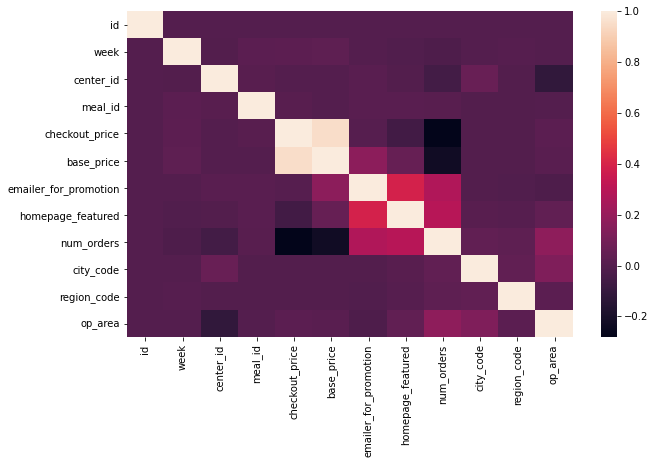

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(cor)

<AxesSubplot:>

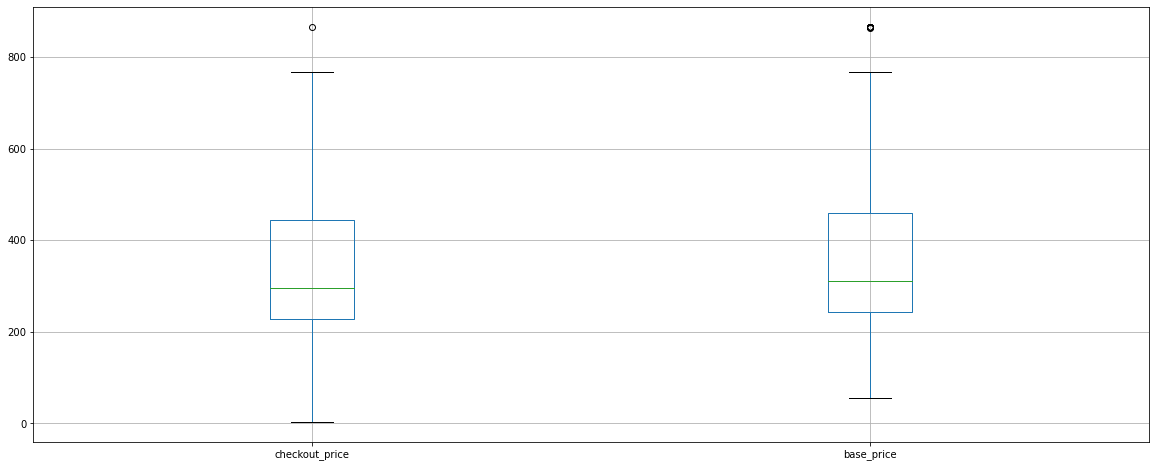

In [24]:
train[[feature for feature in ['checkout_price','base_price']]].boxplot(figsize=(20,8))

<AxesSubplot:>

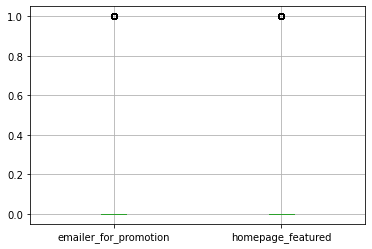

In [25]:
train[['emailer_for_promotion','homepage_featured']].boxplot()

<AxesSubplot:>

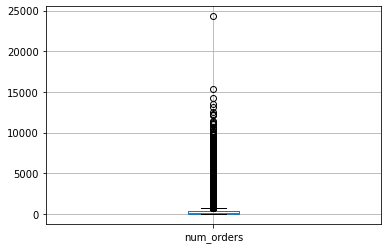

In [26]:
train[['num_orders']].boxplot()

<AxesSubplot:>

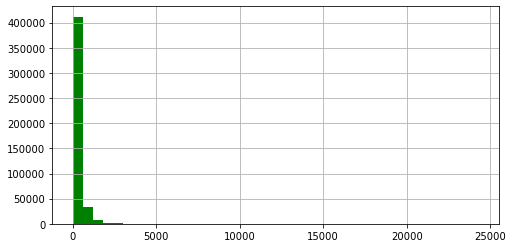

In [27]:
train['num_orders'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='cuisine', ylabel='count'>

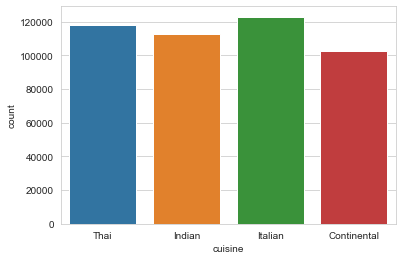

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='cuisine',data=train)

<AxesSubplot:xlabel='category', ylabel='count'>

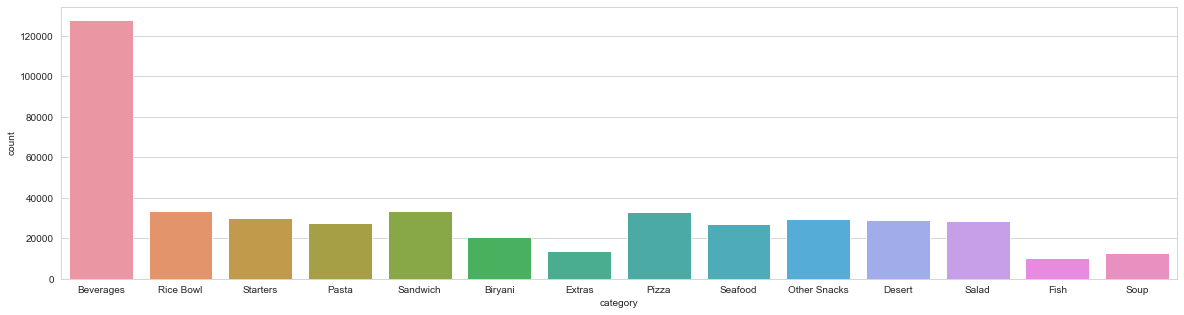

In [29]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.countplot(x='category',data=train)

<AxesSubplot:xlabel='center_type', ylabel='count'>

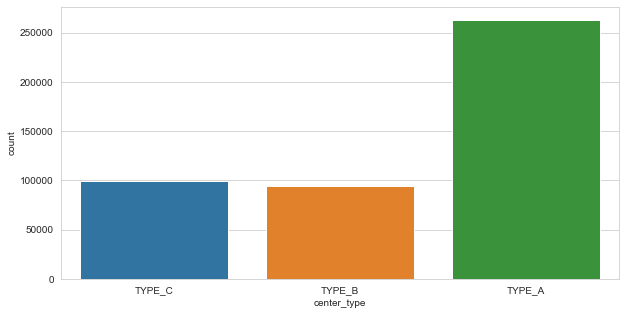

In [30]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='center_type',data=train)

In [31]:
train.groupby('category')['num_orders'].mean()

category
Beverages       316.526116
Biryani          30.651402
Desert           66.250905
Extras          293.834169
Fish             85.595268
Other Snacks    162.234691
Pasta            59.137142
Pizza           222.817309
Rice Bowl       624.822288
Salad           383.218460
Sandwich        529.776276
Seafood         100.895898
Soup             82.023353
Starters        155.276110
Name: num_orders, dtype: float64

<AxesSubplot:xlabel='homepage_featured', ylabel='count'>

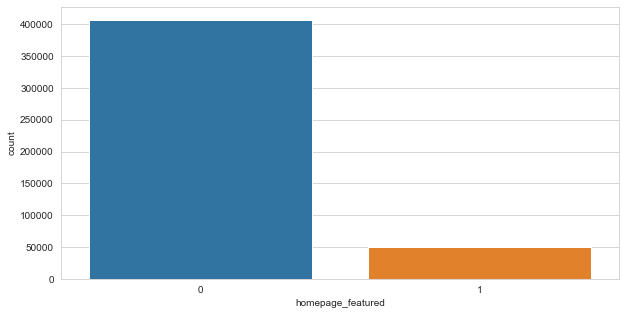

In [32]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='homepage_featured',data=train)

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='count'>

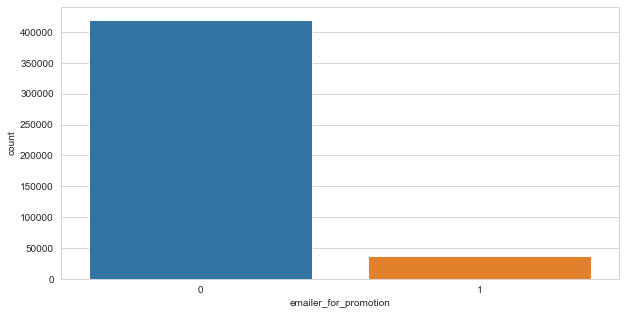

In [33]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='emailer_for_promotion',data=train)

In [34]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [35]:
len(train['id'].value_counts())

456548

In [36]:
#New feature in test dataset
#num_orders=-1
test['num_orders']=-1

In [37]:
#Concatenating training and testing dataset
frame=[train,test]
data=pd.concat(frame)

In [38]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [39]:
data.shape

(489121, 15)

In [40]:
#New Feature Discount_amount=baseprice-checkout price
data['Discount_amount']=data['base_price']-data['checkout_price']

In [41]:
#Discount Y/N
data['discount y/n'] = [1 if x>0 else 0 for x in (data['base_price']-data['checkout_price'])]

In [42]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Discount_amount,discount y/n
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,16.46,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,1.00,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,-1.00,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,1.00,1


In [43]:
#Unique values in categorical feature
for cat in cat_feature:
    print("Unique value in "+cat+" is :",data[cat].nunique())

Unique value in category is : 14
Unique value in cuisine is : 4
Unique value in center_type is : 3


In [44]:
#Mapping the category to value_counts
category=dict(data['category'].value_counts())
data['category']=data['category'].map(category)

In [45]:
data.shape

(489121, 17)

In [46]:
data=pd.get_dummies(data,drop_first=True)

<AxesSubplot:>

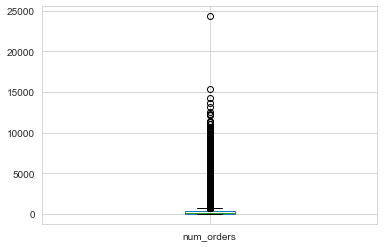

In [47]:
data[['num_orders']].boxplot()

In [48]:
data[data['num_orders']>15000]=data['num_orders'].median()

In [49]:
#Log transformation of num_oreders
# data['num_orders']=np.log(data['num_orders'])

In [50]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,city_code,region_code,op_area,Discount_amount,discount y/n,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,136781,647,56,2.0,15.46,1,0,0,1,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,136781,647,56,2.0,16.46,1,0,0,1,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,136781,647,56,2.0,1.00,1,0,0,1,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,136781,647,56,2.0,-1.00,0,0,0,1,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,136781,647,56,2.0,1.00,1,0,0,1,0,1


In [51]:
data.shape

(489121, 20)

In [52]:
#Id of a test
test_id=test['id']

In [53]:
#Getting a testing dataset from data
test=data[data['num_orders']==-1]

In [54]:
#Getting a testing dataset from data
train=data[data['num_orders']!=-1]

In [55]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,city_code,region_code,op_area,Discount_amount,discount y/n,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1028232,146,55,1885,158.11,159.11,0,0,-1,136781,647,56,2.0,1.0,1,0,0,1,0,1
1,1262649,147,55,1885,159.11,159.11,0,0,-1,136781,647,56,2.0,0.0,0,0,0,1,0,1
2,1453211,149,55,1885,157.14,158.14,0,0,-1,136781,647,56,2.0,1.0,1,0,0,1,0,1
3,1262599,150,55,1885,159.14,157.14,0,0,-1,136781,647,56,2.0,-2.0,0,0,0,1,0,1
4,1495848,151,55,1885,160.11,159.11,0,0,-1,136781,647,56,2.0,-1.0,0,0,0,1,0,1


In [56]:
#Dropping ID as all the unizue value
train.drop('id',axis=1,inplace=True)
test.drop(['id','num_orders'],axis=1,inplace=True)

C:\Users\Mukut\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
#Dependent and independent feature
x=train.drop('num_orders',axis=1)
y=train['num_orders']

In [58]:
train.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'city_code', 'region_code', 'op_area', 'Discount_amount',
       'discount y/n', 'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai',
       'center_type_TYPE_B', 'center_type_TYPE_C'],
      dtype='object')

In [59]:

# # determine the mutual information
# mutual_info = mutual_info_regression(x, y)
# mutual_info

In [60]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = x.columns
# mutual_info.sort_values(ascending=False)

In [61]:
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [62]:
#Dropping week from training and testing set
x.drop('week',axis=1,inplace=True)
test.drop('week',axis=1,inplace=True)

In [63]:
train.isnull().sum()

week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
city_code                0
region_code              0
op_area                  0
Discount_amount          0
discount y/n             0
cuisine_Indian           0
cuisine_Italian          0
cuisine_Thai             0
center_type_TYPE_B       0
center_type_TYPE_C       0
dtype: int64

In [64]:
#Splitting training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [65]:
#Using linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
print('Train Score :',lr.score(x_train,y_train))
print('Test Score :',lr.score(x_test,y_test))

print('R squared :',(r2_score(y_test,lr_predict)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,lr_predict)))

Train Score : 0.2516813487462284
Test Score : 0.24748021514489582
R squared : 0.24748021514489582
RMSLE : 337.97766649997646


In [66]:
# #Using KNN
# kn=KNeighborsRegressor()
# kn.fit(x_train,y_train)
# kn_predict=kn.predict(x_test)
# print('Train Score :',kn.score(x_train,y_train))
# print('Test Score :',kn.score(x_test,y_test))

# print('R squared :',(r2_score(y_test,kn_predict)))
# print('RMSLE :',np.sqrt(mean_squared_error(y_test,kn_predict)))

In [67]:
#Using random forest

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
print('Train Score :',rf.score(x_train,y_train))
print('Test Score :',rf.score(x_test,y_test))

print('R squared :',(r2_score(y_test,rf_predict)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,rf_predict)))

Train Score : 0.9635156423869187
Test Score : 0.8236938649853309
R squared : 0.8236938649853309
RMSLE : 163.59226079479072


In [68]:
#Using XGboost
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb_predict=xgb.predict(x_test)
print('Train Score :',xgb.score(x_train,y_train))
print('Test Score :',xgb.score(x_test,y_test))

print('R squared :',(r2_score(y_test,xgb_predict)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,xgb_predict)))

Train Score : 0.8520334926554947
Test Score : 0.8170358190827554
R squared : 0.8170358190827554
RMSLE : 166.65259465667953


In [69]:
#Using Gradient boost
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_predict=gb.predict(x_test)
print('Train Score :',gb.score(x_train,y_train))
print('Test Score :',gb.score(x_test,y_test))

print('R squared :',(r2_score(y_test,gb_predict)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,gb_predict)))

Train Score : 0.6372322187482226
Test Score : 0.627503370020154
R squared : 0.627503370020154
RMSLE : 237.78815422858762


In [86]:
#Predicting Testing dataset
rf.fit(x,y)
m1=rf.predict(test)


In [75]:
final=(m1+m2)/2

In [84]:
frame= list(zip(test_id,m1))
submission=pd.DataFrame(frame,columns=['id','num_orders'])

In [85]:
#Downloading dataframe to CSV
submission.to_csv('my_submission.csv',index=False)
